In [1]:
import glob
import pandas as pd
import ast
import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
glob.glob('../data/*.csv')

['../data/car_ads_chunk1.csv',
 '../data/car_ads_chunk2.csv',
 '../data/car_ads_chunk3.csv',
 '../data/processed_ads_df.csv',
 '../data/car_ads_chunk4.csv']

In [3]:
scraped_ads_df = pd.concat([pd.read_csv(pth) for pth in glob.glob('../data/*.csv')])

/tmp/ipykernel_35320/1556732045.py:1: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  scraped_ads_df = pd.concat([pd.read_csv(pth) for pth in glob.glob('data/*.csv')])


## Sanity check of the scraped data

In [9]:
scraped_ads_df.head()

,Unnamed: 0,geolocation,marketplace,leasing,price_per_unit,consent,is_new,foreign_number_plate,states,label,...,dealers_only,modified,all_final_category_ids,length,has_360photos,vtype_xyma_or_part,promotion,fueltype,has_photos,parked
0,fe2d1856-9561-4383-b721-2b20b41b7b54,"{'geolocation': {'lat': 37.923983, 'lon': 23.7...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:14:14,[15218],NaN,False,car,"{'available': True, 'previous_promotions_count...",Petrol,True,-
1,5693a462-24ed-4c04-ab86-13f4fbefdebf,"{'geolocation': {'lat': 37.99018681814817, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:14:01,[15218],NaN,False,car,"{'available': True, 'previous_promotions_count...",Plug-in hybrid petrol,True,-
2,d8adcb3d-f9b3-4f75-b59d-842b4ef3263a,"{'geolocation': {'lat': 37.9870202704, 'lon': ...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:23:06,[15211],NaN,False,car,NaN,Petrol,True,-
3,db5b7b25-1f6a-467e-8df4-7b8390dd146f,"{'geolocation': {'lat': 40.5851712258, 'lon': ...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:23:04,[15213],NaN,False,car,NaN,Plug-in hybrid diesel,True,-
4,ac99cd0b-2081-44c0-bbcb-5a9083b48c9f,"{'geolocation': {'lat': 37.9615741704, 'lon': ...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:22:58,[15211],NaN,False,car,NaN,Petrol,True,-


In [7]:
scraped_ads_df.shape

(143255, 70)

## Exploration of the dataset:

In [37]:
scraped_ads_df.columns.tolist()

['Unnamed: 0',
 'geolocation',
 'marketplace',
 'leasing',
 'price_per_unit',
 'consent',
 'is_new',
 'foreign_number_plate',
 'states',
 'label',
 'own',
 'model_stub',
 'thumbs',
 'registration',
 'seo',
 'paid_features',
 'category_ids',
 'dealer_cls',
 'id',
 'category',
 'price_debatable',
 'user_id',
 'thumb',
 'certificate',
 'title',
 'views',
 'without_vat',
 'descriptive_title',
 'seller',
 'has_youtube',
 'created',
 'external_link',
 'seo_json_ld',
 'clicks',
 'url_slug',
 'seo_url',
 'mileage',
 'has_finance',
 'key_features',
 'is_parked',
 'price',
 'title_parts',
 'short_description',
 'crashed',
 'address_long',
 'thumbs_patterns',
 'raw_price',
 'address',
 'price_parked',
 'deleted_date',
 'offertype',
 'has_shorts',
 'has_certificate',
 'engine_size',
 'is_deleted',
 'has_leasing',
 'thumb_pattern',
 'discount',
 'from_promotion',
 'finance_options',
 'dealers_only',
 'modified',
 'all_final_category_ids',
 'length',
 'has_360photos',
 'vtype_xyma_or_part',
 'promot

In [38]:
scraped_ads_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143255 entries, 0 to 19031
Data columns (total 70 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Unnamed: 0              143255 non-null  object 
 1   geolocation             143251 non-null  object 
 2   marketplace             0 non-null       float64
 3   leasing                 143255 non-null  object 
 4   price_per_unit          0 non-null       float64
 5   consent                 0 non-null       float64
 6   is_new                  143255 non-null  bool   
 7   foreign_number_plate    143255 non-null  bool   
 8   states                  143255 non-null  object 
 9   label                   4769 non-null    object 
 10  own                     143255 non-null  bool   
 11  model_stub              143255 non-null  object 
 12  thumbs                  140788 non-null  object 
 13  registration            143255 non-null  object 
 14  seo                     14

In [75]:
data_completion = (scraped_ads_df.isna().sum()/(scraped_ads_df.shape[0])).sort_values(ascending=False)

In [76]:
#We see that out of the 70 fields, there are 13 fields with above 92% missing values. These fields do not provide any important information and we will therefore o98
# mit them from our dataset.
data_completion

price_per_unit            1.0
marketplace               1.0
consent                   1.0
length                    1.0
short_description         1.0
                         ... 
all_final_category_ids    0.0
vtype_xyma_or_part        0.0
fueltype                  0.0
has_photos                0.0
parked                    0.0
Length: 70, dtype: float64

In [40]:
scraped_ads_df.leasing.value_counts() #majority of the cars aren't leased and even the ones with a possible leasing are still for sale

leasing
{'only_leasing': False, 'default_leasing_option': None}                                                                                                                                                                                                                                                                                                                                                                                                                                            141273
{'only_leasing': False, 'default_leasing_option': {'duration': {'suffix': 'Months', 'value': '48'}, 'mileage': {'suffix': 'Km', 'value': '15.000'}, 'with_vat': False, 'downpayment': {'suffix': '€', 'value': '1.500'}, 'lease': {'suffix': '€', 'value': '185'}}, 'option': {'duration': {'suffix': 'Months', 'value': '48'}, 'mileage': {'suffix': 'Km', 'value': '15.000'}, 'with_vat': False, 'downpayment': {'suffix': '€', 'value': '1.500'}, 'lease': {'suffix': '€', 'value': '185'}}}       134
{'only_leasi

In [42]:
scraped_ads_df.is_new.value_counts()/scraped_ads_df.shape[0]

is_new
False    0.9831
True     0.0169
Name: count, dtype: float64

In [45]:
scraped_ads_df.foreign_number_plate.value_counts()/scraped_ads_df.shape[0]

foreign_number_plate
False    0.997368
True     0.002632
Name: count, dtype: float64

In [54]:
scraped_ads_df.states.value_counts()

states
{'is_non_public': False, 'is_deleted': False, 'dealers_only': False, 'is_ghosted': False, 'is_removed': False, 'is_unlisted': None, 'is_dealers_only_cause_foreign': False, 'is_hidden': False}    140762
{'is_non_public': False, 'is_removed': False, 'is_deleted': False, 'is_unlisted': None, 'is_ghosted': False, 'is_dealers_only_cause_foreign': False, 'is_hidden': False, 'dealers_only': False}      2477
{'is_non_public': False, 'is_deleted': False, 'dealers_only': False, 'is_ghosted': True, 'is_removed': False, 'is_unlisted': None, 'is_dealers_only_cause_foreign': False, 'is_hidden': False}          9
{'is_non_public': True, 'is_deleted': False, 'dealers_only': False, 'is_ghosted': False, 'is_removed': False, 'is_unlisted': None, 'is_dealers_only_cause_foreign': False, 'is_hidden': False}          3
{'is_non_public': False, 'is_deleted': False, 'dealers_only': False, 'is_ghosted': False, 'is_removed': False, 'is_unlisted': None, 'is_dealers_only_cause_foreign': False, 'is_hidden': 

In [56]:
scraped_ads_df.states.value_counts()#/scraped_ads_df.shape[0]

states
{'is_non_public': False, 'is_deleted': False, 'dealers_only': False, 'is_ghosted': False, 'is_removed': False, 'is_unlisted': None, 'is_dealers_only_cause_foreign': False, 'is_hidden': False}    140762
{'is_non_public': False, 'is_removed': False, 'is_deleted': False, 'is_unlisted': None, 'is_ghosted': False, 'is_dealers_only_cause_foreign': False, 'is_hidden': False, 'dealers_only': False}      2477
{'is_non_public': False, 'is_deleted': False, 'dealers_only': False, 'is_ghosted': True, 'is_removed': False, 'is_unlisted': None, 'is_dealers_only_cause_foreign': False, 'is_hidden': False}          9
{'is_non_public': True, 'is_deleted': False, 'dealers_only': False, 'is_ghosted': False, 'is_removed': False, 'is_unlisted': None, 'is_dealers_only_cause_foreign': False, 'is_hidden': False}          3
{'is_non_public': False, 'is_deleted': False, 'dealers_only': False, 'is_ghosted': False, 'is_removed': False, 'is_unlisted': None, 'is_dealers_only_cause_foreign': False, 'is_hidden': 

In [ ]:
### We see that 98% of the data has the same value in state, we have 1 deleted ad, 3 hidden ads, 3 non public ads and 9 ghosted ads,

In [59]:
#We see cars for rent, people looking for a specific car and posting an ad and
scraped_ads_df.label.value_counts()

label
{'name': 'new', 'value': 'New'}            2083
{'name': 'wanted', 'value': 'Wanted'}      1631
{'name': 'wanted', 'value': 'Ζητείται'}     397
{'name': 'new', 'value': 'Καινούργιο'}      392
{'name': 'rent', 'value': 'Leasing'}        176
{'name': 'rent', 'value': 'Rent'}            70
{'name': 'rent', 'value': 'Ενοικίαση'}       20
Name: count, dtype: int64

In [65]:
# We see that 98% of the ads with a label new have a is_new value set to True

scraped_ads_df.loc[scraped_ads_df.label == "{'name': 'new', 'value': 'New'}",'is_new'].sum()/scraped_ads_df.loc[scraped_ads_df.label == "{'name': 'new', 'value': 'New'}"].shape[0]

np.float64(0.9798367738838214)

In [79]:
scraped_ads_df.model_stub.isna().sum()/scraped_ads_df.shape[0]

np.float64(0.0)

In [91]:
scraped_ads_df.price_debatable.sum()/scraped_ads_df.shape[0]

np.float64(0.6466650378695333)

In [129]:
scraped_ads_df.dealers_only.sum()/scraped_ads_df.shape[0]

np.float64(0.0)

In [134]:
scraped_ads_df.vtype_xyma_or_part.value_counts()/scraped_ads_df.shape[0]

vtype_xyma_or_part
car    1.0
Name: count, dtype: float64

In [128]:
scraped_ads_df[['id','certificate','has_certificate']].head()

,id,certificate,has_certificate
0,42290233,NaN,False
1,44290953,"{'is_public_available': True, 'requested_by_us...",False
2,41808723,NaN,False
3,44353799,NaN,False
4,41597553,NaN,False


We obtained 143 255 car ads from scraping the website and 70 features per ad. Now if we look at the website's page we see that there are 132370 ads. We will have to check for duplicate ads or

![Sample Image](../photos/car_gr_number_of_ads.png)

Let's check if we have duplicated ads or why this happens:

In [12]:
scraped_ads_df.id.nunique()

125544

We see that we have 125 544 unique ids from the ad ids. So we will look at some of the ids present multiple times in the dataset

In [23]:
scraped_ads_df.loc[scraped_ads_df.duplicated(subset=['id']), ['id','model_stub','price']]

,id,model_stub,price
28,15837437,Saab 9-3 '05 AERO!!ΔΕΡΜΑ 1 ΧΡΟΝΟ ΕΓΓΥΗΣΗ,5.900 €
29,337434767,Toyota Yaris '17 1.0 VVTI 5θυρο,11.500 €
30,339339239,Mini Countryman '21 ΜINI F60 COUNTRYMAN LCI,32.000 €
31,333259160,Opel Corsa '17 1.4 ΑΥΤΟΜΑΤΟ,11.900 €
32,330470427,Opel Astra '16 1 ΧΡΟΝΟ ΕΓΓΥΗΣΗ!ΑΡΙΣΤΟ,12.800 €
...,...,...,...
18955,44121697,Mercedes-Benz GLE 350 '24 DIESEL PLUG-IN HYBRI...,128.000 €
18980,42359262,Peugeot 5008 '21 EAT8 Active Plus 7θέσιο Ιστορ...,25.900 €
18981,44418328,Ford Ranger '22 Wildtrak Doublecab ελλ αντ/πείας,30.900 €
19006,41517536,Hyundai i 20 '19,9.990 €


In [25]:
scraped_ads_df.id.value_counts()

id
44271400     37
44169219     37
43914242     36
44292092     36
44280593     36
             ..
42102458      1
42100539      1
42098139      1
43921882      1
339506142     1
Name: count, Length: 125544, dtype: int64

In [28]:
44271400 in scraped_ads_df.duplicated().values

False

In [30]:
scraped_ads_df[scraped_ads_df.id == 44271400]

,Unnamed: 0,geolocation,marketplace,leasing,price_per_unit,consent,is_new,foreign_number_plate,states,label,...,dealers_only,modified,all_final_category_ids,length,has_360photos,vtype_xyma_or_part,promotion,fueltype,has_photos,parked
833,c15501ea-e98f-4e54-a1c6-e222b0c434dc,"{'geolocation': {'lat': 39.66950871398942, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:12:30,[15213],NaN,False,car,"{'available': True, 'previous_promotions_count...",Petrol,True,-
1710,126dea4f-e78b-4d43-9e80-6d92f85002bf,"{'geolocation': {'lat': 39.66950871398942, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:12:30,[15213],NaN,False,car,NaN,Petrol,True,-
1716,67ae2869-b7dc-4cc6-ac79-198baa88527d,"{'geolocation': {'lat': 39.66950871398942, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:12:30,[15213],NaN,False,car,NaN,Petrol,True,-
5014,f8fd3620-1af5-4a54-8060-7f8a00757c62,"{'geolocation': {'lat': 39.66950871398942, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:12:30,[15213],NaN,False,car,"{'available': True, 'previous_promotions_count...",Petrol,True,-
5611,0ee9ddc2-d6b1-407e-93dd-2ef4837e5f6e,"{'geolocation': {'lat': 39.66950871398942, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:12:30,[15213],NaN,False,car,"{'available': True, 'previous_promotions_count...",Petrol,True,-
15414,5de83ed4-22d9-43c8-9353-a77872dbc9ec,"{'geolocation': {'lat': 39.66950871398942, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 12:12:30,[15213],NaN,False,car,"{'available': True, 'previous_promotions_count...",Petrol,True,-
25059,7d811186-4c53-406e-9f16-dfdfbc570f0d,"{'geolocation': {'lat': 39.66950871398942, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 13:17:07,[15213],NaN,False,car,"{'available': True, 'previous_promotions_count...",Petrol,True,-
36500,6043559a-9c48-4cd3-a19a-c6c0b3ce9ff2,"{'geolocation': {'lat': 39.66950871398942, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 13:17:07,[15213],NaN,False,car,"{'available': True, 'previous_promotions_count...",Petrol,True,-
36915,5bbe97a5-58ee-48cc-9df8-6fd6d228bb27,"{'geolocation': {'lat': 39.66950871398942, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 13:17:07,[15213],NaN,False,car,"{'available': True, 'previous_promotions_count...",Petrol,True,-
40685,d38d5400-f534-4d40-94ba-731b59010b68,"{'geolocation': {'lat': 39.66950871398942, 'lo...",NaN,"{'only_leasing': False, 'default_leasing_optio...",NaN,NaN,False,False,"{'is_non_public': False, 'is_deleted': False, ...",NaN,...,False,2025-02-14 13:17:07,[15213],NaN,False,car,"{'available': True, 'previous_promotions_count...",Petrol,True,-


When looking at examples of duplicated ifs, we encounter the following cases:
- promoted ad (44271400) they occur multiple times in the paginations due to their promoted nature
-

In [35]:
scraped_ads_df[scraped_ads_df.from_promotion].id.value_counts()

id
41968593     5
340761557    5
43198768     5
43543230     5
343865553    5
            ..
43806269     1
43314313     1
42425801     1
44374442     1
41906122     1
Name: count, Length: 125522, dtype: int64

# Processing

## Dropping unnecessary columns:

The columns we are dropping are either dropped because they are not filled for any ad, if their value is the same accross all ads. We also delete somecolumns  we judge irrelevant to our study and explain why as a comment below in this case

In [4]:
columns_to_drop = [
    'marketplace',
    'leasing',
    'price_per_unit',
    'consent',
    'states', #data about the state of the ad (deleted non publix, ghosted etc.) not useful for us and 98% of the ads have the same values
    'own',
    'seo',
    'paid_features', #info about premium payments related to the posting
    'category_ids', #category of the ad (car, vehicle etc) not relevant as we only have cars
    'dealer_cls',
    'category',
    'thumb',
    'certificate',
    'views',
    'has_youtube',
    'external_link',
    'clicks',
    'url_slug',
    'seo_url',
    'has_finance',
    'is_parked',
    'price',
    'thumbs_patterns',
    'address', #We will keep address_long
    'price_parked',
    'deleted_date',
    'offertype',
    'has_shorts',
    'has_certificate',
    'is_deleted',
    'has_leasing',
    'thumb_pattern',
    'discount',
    'from_promotion',
    'finance_options',
    'dealers_only',
    'all_final_category_ids',
    'length',
    'has_360photos',
    'vtype_xyma_or_part',
    'promotion',
    'has_photos',
    'parked']

In [5]:
scraped_ads_df.drop(columns=columns_to_drop, inplace=True)

In [6]:
scraped_ads_df.head()

,Unnamed: 0,geolocation,is_new,foreign_number_plate,label,model_stub,thumbs,registration,id,price_debatable,...,mileage,key_features,title_parts,short_description,crashed,address_long,raw_price,engine_size,modified,fueltype
0,fe2d1856-9561-4383-b721-2b20b41b7b54,"{'geolocation': {'lat': 37.923983, 'lon': 23.7...",False,False,NaN,Peugeot 2008 '20 1.2 PureTech Allure,"{'count': 12, 'urls': ['https://static.car.gr/...",10/2020,42290233,False,...,73.000 km,"[{'key': 'registration', 'value': '10/2020', '...","{'make': 'Peugeot', 'variant': '1.2 PureTech A...",NaN,False,ALIMOS P. ATTIKIS 17456,17900.0,1.200 cc,2025-02-14 12:14:14,Petrol
1,5693a462-24ed-4c04-ab86-13f4fbefdebf,"{'geolocation': {'lat': 37.99018681814817, 'lo...",False,False,NaN,Land Rover Range Rover Evoque '21 P300e S PHEV...,"{'count': 16, 'urls': ['https://static.car.gr/...",1/2021,44290953,False,...,25.000 km,"[{'key': 'registration', 'value': '1/2021', 'l...","{'make': 'Land Rover', 'variant': 'P300e S PHE...",NaN,False,XOLARGOS P. ATTIKIS 15562,47000.0,1.498 cc,2025-02-14 12:14:01,Plug-in hybrid petrol
2,d8adcb3d-f9b3-4f75-b59d-842b4ef3263a,"{'geolocation': {'lat': 37.9870202704, 'lon': ...",False,False,NaN,Citroen C1 '18 / II / VTi FEEL iTOUCH / 1.0cc...,"{'count': 28, 'urls': ['https://static.car.gr/...",5/2018,41808723,False,...,47.836 km,"[{'key': 'registration', 'value': '5/2018', 'l...","{'make': 'Citroen', 'variant': '/ II / VTi FEE...",NaN,False,ATHINA 11855,8700.0,1.000 cc,2025-02-14 12:23:06,Petrol
3,db5b7b25-1f6a-467e-8df4-7b8390dd146f,"{'geolocation': {'lat': 40.5851712258, 'lon': ...",False,False,NaN,Mercedes-Benz E 300 '20 de Expose,"{'count': 62, 'urls': ['https://static.car.gr/...",10/2020,44353799,True,...,55.800 km,"[{'key': 'registration', 'value': '10/2020', '...","{'make': 'Mercedes-Benz', 'variant': 'de Expos...",NaN,False,VEROIA 59100,45000.0,1.950 cc,2025-02-14 12:23:04,Plug-in hybrid diesel
4,ac99cd0b-2081-44c0-bbcb-5a9083b48c9f,"{'geolocation': {'lat': 37.9615741704, 'lon': ...",False,False,NaN,Renault Twingo '17 DYNAMIC,"{'count': 14, 'urls': ['https://static.car.gr/...",2/2017,41597553,False,...,118.500 km,"[{'key': 'registration', 'value': '2/2017', 'l...","{'make': 'Renault', 'variant': 'DYNAMIC', 'mod...",NaN,False,KERATSINI P. ATTIKIS 18756,11500.0,900 cc,2025-02-14 12:22:58,Petrol


In [7]:
scraped_ads_df['geolocation'] = scraped_ads_df.geolocation.apply(lambda x : ast.literal_eval(x) if type(x) == str else x)

In [8]:
scraped_ads_df.shape


(143255, 27)

In [9]:
scraped_ads_df.dropna(subset=['geolocation'], inplace=True)

In [10]:
scraped_ads_df = pd.concat([scraped_ads_df['geolocation'].apply(lambda x : pd.Series(x['geolocation'])), scraped_ads_df.drop(columns=['geolocation']), ], axis=1)

In [11]:
scraped_ads_df = pd.concat([scraped_ads_df.drop(columns='registration'), scraped_ads_df.registration.str.split('/',expand=True).rename(columns={0:'registration_month',1:'registration_year'})],axis=1)

In [12]:
scraped_ads_df['mileage'] = scraped_ads_df['mileage'].str[:-3].str.replace('.','').astype(float)

In [13]:
pd.set_option("display.float_format", "{:.2f}".format)

In [14]:
scraped_ads_df.mileage.describe()

count    143244.00
mean     134531.97
std       94568.98
min           0.00
25%       74903.00
50%      125300.00
75%      182000.00
max     2000000.00
Name: mileage, dtype: float64

In [15]:
scraped_ads_df.key_features = scraped_ads_df.key_features.apply(lambda x : ast.literal_eval(x))

In [16]:
scraped_ads_df.key_features.iloc[0]

[{'key': 'registration', 'value': '10/2020', 'label': 'Registration'},
 {'label': 'Mileage', 'key': 'mileage', 'value': '73.000 km', 'extra': None},
 {'label': 'Engine', 'key': 'engine_size', 'value': '1.200 cc', 'extra': None},
 {'key': 'engine_power', 'value': '131 bhp', 'label': 'Horsepower'},
 {'key': 'fuel_type', 'value': 'Petrol', 'label': 'Fuel type'}]

In [17]:
[{'a':2, 'b':3}] + [{'a':2, 'b':3}]

[{'a': 2, 'b': 3}, {'a': 2, 'b': 3}]

In [18]:
list_dicts = scraped_ads_df.key_features.to_list()

In [22]:
unique_keys = {d['key'] for lst in list_dicts for d in lst }

In [23]:
unique_keys

{'battery_charge_time',
 'battery_range',
 'engine_power',
 'engine_size',
 'features',
 'fuel_type',
 'gearbox_type',
 'mileage',
 'registration'}

In [24]:
scraped_ads_df['battery_charge_time'] = scraped_ads_df['key_features'].apply(lambda x : next((y['value'] for y in x if y['key'] == 'battery_charge_time'), None))
scraped_ads_df['battery_range'] = scraped_ads_df['key_features'].apply(lambda x : next((y['value'] for y in x if y['key'] == 'battery_range'), None))
scraped_ads_df['engine_power'] = scraped_ads_df['key_features'].apply(lambda x : next((y['value'] for y in x if y['key'] == 'engine_power'), None))
scraped_ads_df['engine_size'] = scraped_ads_df['key_features'].apply(lambda x : next((y['value'] for y in x if y['key'] == 'engine_size'), None))
scraped_ads_df['fuel_type'] = scraped_ads_df['key_features'].apply(lambda x : next((y['value'] for y in x if y['key'] == 'fuel_type'), None))

scraped_ads_df['gearbox_type'] = scraped_ads_df['key_features'].apply(lambda x : next((y['value'] for y in x if y['key'] == 'gearbox_type'), None))
scraped_ads_df['features'] = scraped_ads_df['key_features'].apply(lambda x : next((y['value'] for y in x if y['key'] == 'features'), None))



In [30]:
scraped_ads_df.loc[scraped_ads_df.features.notna(),'features'].value_counts()

features
PRICE WITHOUT VAT                      3790
ΤΙΜΗ ΧΩΡΙΣ ΦΠΑ                          643
FOREIGN NUMBERS                         269
ΞΕΝΑ ΝΟΥΜΕΡΑ                             60
FOREIGN NUMBERS • PRICE WITHOUT VAT      35
ΞΕΝΑ ΝΟΥΜΕΡΑ • ΤΙΜΗ ΧΩΡΙΣ ΦΠΑ            11
ΤΙΜΗ ΧΩΡΙΣ ΦΠΑ • ΞΕΝΑ ΝΟΥΜΕΡΑ             2
Name: count, dtype: int64

In [31]:
#We don't want any of thos ads within our dataset since they don't include vat and vat or are with foreign number plates

foreign_number_plate
False    142874
True        377
Name: count, dtype: int64

In [33]:
scraped_ads_df.shape

(143251, 35)

In [35]:
scraped_ads_df = scraped_ads_df[(scraped_ads_df['features'].isna()) & ~(scraped_ads_df['foreign_number_plate'])].drop(columns=['features', 'foreign_number_plate']).copy()

In [36]:
scraped_ads_df.shape

(138441, 33)

In [38]:
scraped_ads_df['title_parts'].head(10)

0    {'make': 'Peugeot', 'variant': '1.2 PureTech A...
1    {'make': 'Land Rover', 'variant': 'P300e S PHE...
2    {'make': 'Citroen', 'variant': '/ II / VTi FEE...
3    {'make': 'Mercedes-Benz', 'variant': 'de Expos...
4    {'make': 'Renault', 'variant': 'DYNAMIC', 'mod...
5    {'make': 'Bmw', 'variant': 'BMW F40', 'model':...
6    {'make': 'Bmw', 'variant': 'BMW F40 116i M', '...
7    {'make': 'Mercedes-Benz', 'variant': 'EXTRA LO...
8    {'make': 'Bmw', 'variant': None, 'model': 'M6'...
9    {'make': 'Alfa Romeo', 'variant': '1.3 JTDM', ...
Name: title_parts, dtype: object

In [42]:
scraped_ads_df['title_parts'] = scraped_ads_df['title_parts'].apply(lambda x : ast.literal_eval(x))

In [41]:
scraped_ads_df["brand"] = scraped_ads_df['title_parts'].apply(lambda x : x['make'])
scraped_ads_df["model"] = scraped_ads_df['title_parts'].apply(lambda x : x['model'])
scraped_ads_df["variant"] = scraped_ads_df['title_parts'].apply(lambda x : x['variant'])
scraped_ads_df["year"] = scraped_ads_df['title_parts'].apply(lambda x : x['year'])

TypeError: string indices must be integers

In [43]:
title_parts = scraped_ads_df['title_parts'].apply(lambda x : pd.Series(x))
title_parts.columns = ['brand','variant','model', 'year']

scraped_ads_df = pd.concat([scraped_ads_df.drop(columns=['title_parts','key_features']), title_parts],axis=1)

In [44]:
scraped_ads_df.head()

,lat,lon,Unnamed: 0,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,registration_year,battery_charge_time,battery_range,engine_power,fuel_type,gearbox_type,brand,variant,model,year
0,37.92,23.74,fe2d1856-9561-4383-b721-2b20b41b7b54,False,NaN,Peugeot 2008 '20 1.2 PureTech Allure,"{'count': 12, 'urls': ['https://static.car.gr/...",42290233,False,1000140525,...,2020,None,None,131 bhp,Petrol,None,Peugeot,1.2 PureTech Allure,2008,20
1,37.99,23.81,5693a462-24ed-4c04-ab86-13f4fbefdebf,False,NaN,Land Rover Range Rover Evoque '21 P300e S PHEV...,"{'count': 16, 'urls': ['https://static.car.gr/...",44290953,False,1001504697,...,2021,3 hours / 1 hours,50 km,305 bhp,Plug-in hybrid petrol,Automatic,Land Rover,P300e S PHEV 1.5lt 309ps,Range Rover Evoque,21
2,37.99,23.70,d8adcb3d-f9b3-4f75-b59d-842b4ef3263a,False,NaN,Citroen C1 '18 / II / VTi FEEL iTOUCH / 1.0cc...,"{'count': 28, 'urls': ['https://static.car.gr/...",41808723,False,1001498,...,2018,None,None,69 bhp,Petrol,None,Citroen,/ II / VTi FEEL iTOUCH / 1.0cc / 69 HP / 3πλη...,C1,18
3,40.59,22.17,db5b7b25-1f6a-467e-8df4-7b8390dd146f,False,NaN,Mercedes-Benz E 300 '20 de Expose,"{'count': 62, 'urls': ['https://static.car.gr/...",44353799,True,1001277,...,2020,None,50 km,306 bhp,Plug-in hybrid diesel,Automatic,Mercedes-Benz,de Expose,E 300,20
4,37.96,23.61,ac99cd0b-2081-44c0-bbcb-5a9083b48c9f,False,NaN,Renault Twingo '17 DYNAMIC,"{'count': 14, 'urls': ['https://static.car.gr/...",41597553,False,1006647,...,2017,None,None,90 bhp,Petrol,Automatic,Renault,DYNAMIC,Twingo,17


In [46]:
scraped_ads_df['engine_size'] = scraped_ads_df.engine_size.str.replace('cc','').str.replace('kw','').str.replace('.','').str.replace('watt','').astype(float)

In [47]:
scraped_ads_df.created = pd.to_datetime(scraped_ads_df.created)
scraped_ads_df.modified = pd.to_datetime(scraped_ads_df.modified)

In [48]:
scraped_ads_df.registration_year = scraped_ads_df.registration_year.astype(int)
scraped_ads_df.registration_month = scraped_ads_df.registration_month.astype(int)
scraped_ads_df.year = scraped_ads_df.year.astype(int)

In [49]:
scraped_ads_df.head()

,lat,lon,Unnamed: 0,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,registration_year,battery_charge_time,battery_range,engine_power,fuel_type,gearbox_type,brand,variant,model,year
0,37.92,23.74,fe2d1856-9561-4383-b721-2b20b41b7b54,False,NaN,Peugeot 2008 '20 1.2 PureTech Allure,"{'count': 12, 'urls': ['https://static.car.gr/...",42290233,False,1000140525,...,2020,None,None,131 bhp,Petrol,None,Peugeot,1.2 PureTech Allure,2008,20
1,37.99,23.81,5693a462-24ed-4c04-ab86-13f4fbefdebf,False,NaN,Land Rover Range Rover Evoque '21 P300e S PHEV...,"{'count': 16, 'urls': ['https://static.car.gr/...",44290953,False,1001504697,...,2021,3 hours / 1 hours,50 km,305 bhp,Plug-in hybrid petrol,Automatic,Land Rover,P300e S PHEV 1.5lt 309ps,Range Rover Evoque,21
2,37.99,23.70,d8adcb3d-f9b3-4f75-b59d-842b4ef3263a,False,NaN,Citroen C1 '18 / II / VTi FEEL iTOUCH / 1.0cc...,"{'count': 28, 'urls': ['https://static.car.gr/...",41808723,False,1001498,...,2018,None,None,69 bhp,Petrol,None,Citroen,/ II / VTi FEEL iTOUCH / 1.0cc / 69 HP / 3πλη...,C1,18
3,40.59,22.17,db5b7b25-1f6a-467e-8df4-7b8390dd146f,False,NaN,Mercedes-Benz E 300 '20 de Expose,"{'count': 62, 'urls': ['https://static.car.gr/...",44353799,True,1001277,...,2020,None,50 km,306 bhp,Plug-in hybrid diesel,Automatic,Mercedes-Benz,de Expose,E 300,20
4,37.96,23.61,ac99cd0b-2081-44c0-bbcb-5a9083b48c9f,False,NaN,Renault Twingo '17 DYNAMIC,"{'count': 14, 'urls': ['https://static.car.gr/...",41597553,False,1006647,...,2017,None,None,90 bhp,Petrol,Automatic,Renault,DYNAMIC,Twingo,17


In [50]:
scraped_ads_df.drop_duplicates(inplace=True)

In [65]:
scraped_ads_df.shape

(138441, 35)

In [74]:
scraped_ads_df.id.value_counts() > 1

id
44271400      True
44169219      True
44292092      True
43914242      True
44280593      True
             ...  
41446583     False
43863082     False
43982648     False
318686765    False
44373924     False
Name: count, Length: 121281, dtype: bool

In [75]:
scraped_ads_df[scraped_ads_df.id == 44271400]

,lat,lon,Unnamed: 0,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,registration_year,battery_charge_time,battery_range,engine_power,fuel_type,gearbox_type,brand,variant,model,year
833,39.67,20.84,c15501ea-e98f-4e54-a1c6-e222b0c434dc,False,NaN,Toyota Auris '12,"{'count': 11, 'urls': ['https://static.car.gr/...",44271400,True,1000924337,...,2012,None,None,101 bhp,Petrol,None,Toyota,None,Auris,12
1710,39.67,20.84,126dea4f-e78b-4d43-9e80-6d92f85002bf,False,NaN,Toyota Auris '12,"{'count': 11, 'urls': ['https://static.car.gr/...",44271400,True,1000924337,...,2012,None,None,101 bhp,Petrol,None,Toyota,None,Auris,12
1716,39.67,20.84,67ae2869-b7dc-4cc6-ac79-198baa88527d,False,NaN,Toyota Auris '12,"{'count': 11, 'urls': ['https://static.car.gr/...",44271400,True,1000924337,...,2012,None,None,101 bhp,Petrol,None,Toyota,None,Auris,12
5014,39.67,20.84,f8fd3620-1af5-4a54-8060-7f8a00757c62,False,NaN,Toyota Auris '12,"{'count': 11, 'urls': ['https://static.car.gr/...",44271400,True,1000924337,...,2012,None,None,101 bhp,Petrol,None,Toyota,None,Auris,12
5611,39.67,20.84,0ee9ddc2-d6b1-407e-93dd-2ef4837e5f6e,False,NaN,Toyota Auris '12,"{'count': 11, 'urls': ['https://static.car.gr/...",44271400,True,1000924337,...,2012,None,None,101 bhp,Petrol,None,Toyota,None,Auris,12
15414,39.67,20.84,5de83ed4-22d9-43c8-9353-a77872dbc9ec,False,NaN,Toyota Auris '12,"{'count': 11, 'urls': ['https://static.car.gr/...",44271400,True,1000924337,...,2012,None,None,101 bhp,Petrol,None,Toyota,None,Auris,12
25059,39.67,20.84,7d811186-4c53-406e-9f16-dfdfbc570f0d,False,NaN,Toyota Auris '12,"{'count': 16, 'urls': ['https://static.car.gr/...",44271400,True,1000924337,...,2012,None,None,101 bhp,Petrol,None,Toyota,None,Auris,12
36500,39.67,20.84,6043559a-9c48-4cd3-a19a-c6c0b3ce9ff2,False,NaN,Toyota Auris '12,"{'count': 16, 'urls': ['https://static.car.gr/...",44271400,True,1000924337,...,2012,None,None,101 bhp,Petrol,None,Toyota,None,Auris,12
36915,39.67,20.84,5bbe97a5-58ee-48cc-9df8-6fd6d228bb27,False,NaN,Toyota Auris '12,"{'count': 16, 'urls': ['https://static.car.gr/...",44271400,True,1000924337,...,2012,None,None,101 bhp,Petrol,None,Toyota,None,Auris,12
40685,39.67,20.84,d38d5400-f534-4d40-94ba-731b59010b68,False,NaN,Toyota Auris '12,"{'count': 16, 'urls': ['https://static.car.gr/...",44271400,True,1000924337,...,2012,None,None,101 bhp,Petrol,None,Toyota,None,Auris,12


In [84]:
scraped_ads_df.reset_index(inplace=True)

In [87]:
scraped_ads_df.shape

(138441, 36)

In [88]:
scraped_ads_df.id.nunique()

121281

In [89]:
scraped_ads_df = scraped_ads_df.groupby(['id']).apply(lambda x : x.loc[x['modified'].idxmax()]).reset_index(drop=True).copy()

/tmp/ipykernel_35320/1971206936.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  scraped_ads_df = scraped_ads_df.groupby(['id']).apply(lambda x : x.loc[x['modified'].idxmax()]).reset_index(drop=True).copy()


In [93]:
scraped_ads_df.drop(columns=['index'],inplace=True)

In [94]:
scraped_ads_df.head()

,lat,lon,Unnamed: 0,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,registration_year,battery_charge_time,battery_range,engine_power,fuel_type,gearbox_type,brand,variant,model,year
0,40.64,22.93,a0685eeb-f147-4842-872b-84e6b5c3a419,False,"{'name': 'wanted', 'value': 'Wanted'}",Smart ForTwo '02 ΑΓΟΡΑΖΩ SMART ΓΙΑ ΑΝΤΑΛΑΚΤΙΚΑ,"{'count': 1, 'urls': ['https://static.car.gr/1...",1961,False,1001713,...,2002,None,None,55 bhp,Other,None,Smart,ΑΓΟΡΑΖΩ SMART ΓΙΑ ΑΝΤΑΛΑΚΤΙΚΑ,ForTwo,2
1,40.54,22.99,fb208079-b3a1-4187-abe1-c3532386445c,False,NaN,Kia Sportage '02 LIMIDET DERMA FULL EXTRA,"{'count': 7, 'urls': ['https://static.car.gr/1...",11709,True,3027523,...,2002,None,None,230 bhp,Petrol,None,Kia,LIMIDET DERMA FULL EXTRA,Sportage,2
2,38.91,22.33,8720e225-a56a-434b-bced-82f7c6b7b3df,False,NaN,Mercedes-Benz C 220 '99 CDI DIESEL,"{'count': 8, 'urls': ['https://static.car.gr/2...",22091,False,3026785,...,1999,None,None,143 bhp,Πετρέλαιο,None,Mercedes-Benz,CDI DIESEL,C 220,99
3,40.99,24.64,11833766-eca4-436f-8be0-f4f304e5946d,False,NaN,Mercedes-Benz C 180 '00 ELEGANS ΥΠΕΡΠΡΟΣΦΟΡΑ,"{'count': 15, 'urls': ['https://static.car.gr/...",34666,True,1001889,...,2000,None,None,116 bhp,Petrol,None,Mercedes-Benz,ELEGANS ΥΠΕΡΠΡΟΣΦΟΡΑ,C 180,0
4,40.27,22.53,a47702b9-4b30-47aa-8e0c-2bd1bdaa151d,False,NaN,Lincoln Town Car '07 STRECH LIMO TIFFANIS,"{'count': 5, 'urls': ['https://static.car.gr/6...",67361,True,3026787,...,2007,None,None,340 bhp,Petrol,Automatic,Lincoln,STRECH LIMO TIFFANIS,Town Car,7


In [105]:
scraped_ads_df.label.value_counts()

label
{'name': 'new', 'value': 'New'}            1744
{'name': 'wanted', 'value': 'Wanted'}      1479
{'name': 'wanted', 'value': 'Ζητείται'}     392
{'name': 'new', 'value': 'Καινούργιο'}      344
{'name': 'rent', 'value': 'Leasing'}        139
{'name': 'rent', 'value': 'Rent'}            43
{'name': 'rent', 'value': 'Ενοικίαση'}       16
Name: count, dtype: int64

In [104]:
scraped_ads_df['label'] = scraped_ads_df['label'].apply(lambda x : ast.literal_eval(x) if type(x) == str else x)

In [111]:
scraped_ads_df['label'] = scraped_ads_df['label'].apply(lambda x : x['name'] if type(x) == dict else x)

In [113]:
scraped_ads_df.label.value_counts()

label
new       2088
wanted    1871
rent       198
Name: count, dtype: int64

In [114]:
scraped_ads_df = scraped_ads_df[(scraped_ads_df.label.isna()) | (scraped_ads_df.label == 'new')].reset_index(drop=True).copy()

In [115]:
scraped_ads_df.shape

(119212, 35)

In [116]:
scraped_ads_df[(scraped_ads_df.label == 'new') & ~(scraped_ads_df.is_new)]

,lat,lon,Unnamed: 0,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,registration_year,battery_charge_time,battery_range,engine_power,fuel_type,gearbox_type,brand,variant,model,year
99162,37.95,23.70,a6c4cb89-7e49-4217-bbf1-1f10e7c4b8a1,False,new,Renault Clio '24 TECHNO LPG ΤΕΛΙΚΗ ΤΙΜΗ &ΔΩΡΑ ...,"{'count': 98, 'urls': ['https://static.car.gr/...",337513527,False,1000643,...,2024,None,None,100 bhp,Αέριο(lpg) - βενζίνη,None,Renault,TECHNO LPG ΤΕΛΙΚΗ ΤΙΜΗ &ΔΩΡΑ 600€,Clio,24
114038,37.95,23.70,3bd16683-ac9d-4a28-bc0c-c94dace2a5cc,False,new,Renault Captur '25 LPG TECHO ΕΤΟΙΜΟΠΑΡΑΔΟΤΟ Τ...,"{'count': 118, 'urls': ['https://static.car.gr...",343795494,False,1000643,...,2025,None,None,100 bhp,Αέριο(lpg) - βενζίνη,None,Renault,LPG TECHO ΕΤΟΙΜΟΠΑΡΑΔΟΤΟ ΤΕΛΙΚΗ ΤΙΜΗ,Captur,25


In [117]:
scraped_ads_df[(scraped_ads_df.label.isna()) & (scraped_ads_df.is_new)]

,lat,lon,Unnamed: 0,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,registration_year,battery_charge_time,battery_range,engine_power,fuel_type,gearbox_type,brand,variant,model,year


In [119]:
scraped_ads_df[scraped_ads_df.raw_price==1]

,lat,lon,Unnamed: 0,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,registration_year,battery_charge_time,battery_range,engine_power,fuel_type,gearbox_type,brand,variant,model,year
39,39.20,26.28,7f3b0b7c-9eb0-422f-a31b-4b5096fcb6dd,False,NaN,Bmw 320 '06 226S1 E46,"{'count': 11, 'urls': ['https://static.car.gr/...",989996,True,1001126,...,2006,None,None,200 bhp,Petrol,None,Bmw,226S1 E46,320,6
41,39.20,26.28,dddf355b-87d9-42b9-899b-73bbfe690ff1,False,NaN,Volvo S40 '05,"{'count': 6, 'urls': ['https://static.car.gr/1...",1014349,True,1001126,...,2005,None,None,110 bhp,Petrol,None,Volvo,None,S40,5
57,37.93,23.73,c5377b6e-41f8-4d82-b87d-35740184bd2d,False,NaN,Mercedes-Benz E 200 '76,"{'count': 11, 'urls': ['https://static.car.gr/...",1301886,True,1001886,...,1976,None,None,114 bhp,Petrol,None,Mercedes-Benz,None,E 200,76
88,35.33,25.18,f96820af-be65-420a-b3b1-3133b19badb7,False,NaN,Jeep Compass '07,"{'count': 5, 'urls': ['https://static.car.gr/1...",1892142,True,1000496,...,2007,None,None,1 bhp,Petrol,None,Jeep,None,Compass,7
125,39.20,26.28,27e86d53-6d7e-4af5-9f21-427156f2036e,False,NaN,Mazda RX-8 '08 1.3 CHALLENGE 192 HP,"{'count': 10, 'urls': ['https://static.car.gr/...",2078157,True,1001126,...,2008,None,None,192 bhp,Petrol,None,Mazda,1.3 CHALLENGE 192 HP,RX-8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117573,38.70,22.42,71e4304c-304b-43a5-a313-2006cffd6c30,False,NaN,Volkswagen T2 '00,"{'count': 8, 'urls': ['https://static.car.gr/3...",344472062,True,5202774,...,2000,None,None,1 bhp,Petrol,None,Volkswagen,None,T2,0
117575,38.70,22.42,f24abe88-dfeb-476c-a241-0e4e5c05f4af,False,NaN,Volkswagen T1 '00,"{'count': 3, 'urls': ['https://static.car.gr/3...",344472069,True,5202774,...,2000,None,None,1 bhp,Βενζίνη,None,Volkswagen,None,T1,0
117602,38.47,22.92,52736706-7ddc-4f9b-bf30-f27e9985ca76,False,NaN,Dodge Caliber '08,"{'count': 5, 'urls': ['https://static.car.gr/3...",344473912,True,1000939196,...,2008,None,None,150 bhp,Βενζίνη,None,Dodge,None,Caliber,8
118425,40.09,21.42,2b096fd8-5e38-4b97-ae25-9850a21867c1,False,NaN,Opel Vectra '01,"{'count': 9, 'urls': ['https://static.car.gr/3...",345005699,True,3026684,...,2001,None,None,100 bhp,Petrol,None,Opel,None,Vectra,1


In [123]:
scraped_ads_df[scraped_ads_df.model.isna()]

,lat,lon,Unnamed: 0,is_new,label,model_stub,thumbs,id,price_debatable,user_id,...,registration_year,battery_charge_time,battery_range,engine_power,fuel_type,gearbox_type,brand,variant,model,year
9,40.73,23.01,440bec3a-115b-402f-bb04-9ae3a6ac6a1e,False,NaN,Car limousine/sedan '64 VOLGA GAZ21 1964 2.5cc...,"{'count': 13, 'urls': ['https://static.car.gr/...",149969,False,1004634,...,1964,None,None,75 bhp,Petrol,None,Αλλο,VOLGA GAZ21 1964 2.5cc 75Ps.,None,64
10,40.73,23.01,5ea85334-3207-4afc-96ad-ac21e2e5c4cb,False,NaN,Car limousine/sedan '59 VOLGA GAZ21 1959 2.5cc...,"{'count': 18, 'urls': ['https://static.car.gr/...",149981,False,1004634,...,1959,None,None,75 bhp,Petrol,None,Αλλο,VOLGA GAZ21 1959 2.5cc 75Ps.,None,59
32,37.85,23.77,a33c3bf5-1f7d-478a-8676-bc2a521832a8,False,NaN,Αυτοκίνητο suv/crossover/4x4 '78 UNIMOG,"{'count': 7, 'urls': ['https://static.car.gr/6...",659769,True,3026750,...,1978,None,None,110 bhp,Βενζίνη,None,Αλλο,UNIMOG,None,78
43,40.95,24.42,ea19e57c-846e-49e4-99cc-c3bb0ade767d,False,NaN,Bmw '72,"{'count': 4, 'urls': ['https://static.car.gr/1...",1037700,True,3026809,...,1972,None,None,101 bhp,Βενζίνη,None,Bmw,None,None,72
44,37.92,23.71,7676832e-2fb8-4beb-965e-323580aaa1ac,False,NaN,Fiat '36 T0POLINO,"{'count': 6, 'urls': ['https://static.car.gr/1...",1060098,False,1005102,...,1936,None,None,75 bhp,Petrol,None,Fiat,T0POLINO,None,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118877,37.98,24.79,711a1d34-e32d-45d6-a567-38d3d2ed2845,False,NaN,Renault '14 Maxity Ανατροπή,"{'count': 11, 'urls': ['https://static.car.gr/...",346315813,False,3027499,...,2014,None,None,134 bhp,Diesel,None,Renault,Maxity Ανατροπή,None,14
118984,37.82,23.79,6b2c5fe0-7d1f-437f-b2ba-0afeeb0b5251,False,NaN,Citroen '17 Jumper 2.0 Blue HDi 130HP Navi Euro 6,"{'count': 22, 'urls': ['https://static.car.gr/...",346613081,False,3027500,...,2017,None,None,130 bhp,Diesel,None,Citroen,Jumper 2.0 Blue HDi 130HP Navi Euro 6,None,17
119015,37.83,23.80,32f95378-2e6b-442f-98c7-4cc5c1fd3447,False,NaN,Citroen '18 Jumpy-Expert L2 Με Ισοθερμικο Θάλαμο,"{'count': 48, 'urls': ['https://static.car.gr/...",346640686,False,3027500,...,2018,None,None,115 bhp,Diesel,None,Citroen,Jumpy-Expert L2 Με Ισοθερμικο Θάλαμο,None,18
119164,37.98,24.79,cb178f30-f0a2-408c-966c-4acc91cb76e2,False,NaN,Nissan '21 1.500cc 115hp 3θέσιο Ελληνικό Diese...,"{'count': 15, 'urls': ['https://static.car.gr/...",346903820,False,3027499,...,2021,None,None,115 bhp,Diesel,None,Nissan,1.500cc 115hp 3θέσιο Ελληνικό Diesel Euro6,None,21


In [125]:
scraped_ads_df.loc[scraped_ads_df['brand'].notna(),'brand'] = scraped_ads_df.loc[scraped_ads_df['brand'].notna(),'brand'].str.lower()
scraped_ads_df.loc[scraped_ads_df['model'].notna(),'model'] = scraped_ads_df.loc[scraped_ads_df['model'].notna(),'model'].str.lower()
scraped_ads_df.loc[scraped_ads_df['variant'].notna(),'variant'] = scraped_ads_df.loc[scraped_ads_df['variant'].notna(),'variant'].str.lower()

In [162]:
scraped_ads_df.loc[:,['brand','model','year','raw_price']].groupby(by=['brand','model','year']).agg(['median','count'])

raw_price      
                            median count
brand    model      year                
abarth   124 spider 16    32000.00     1
                    17    28990.00     1
         500        8     13900.00     3
                    9     11700.00     8
                    10    10750.00     2
...                            ...   ...
wiesmann mf 4       1      2800.00     1
xev      yoyo       24     9945.00     6
                    25    10900.00     1
zhidou   d1         7      3000.00     1
                    16     4500.00     1

[11846 rows x 2 columns]

In [168]:
zoom = scraped_ads_df.loc[:,['brand','model','year','raw_price']].groupby(by=['brand','model','year']).agg(['mean','count'])

In [199]:
zoom.iloc[zoom.index.levels[2] > 15]

IndexError: Boolean index has wrong length: 89 instead of 11846

In [ ]:
zoom[(zoom['raw_price']['mean'] > 9000) &(zoom['raw_price']['mean'] < 12000) ]

In [189]:
zoom[(zoom['raw_price']['mean'] > 9000) &(zoom['raw_price']['mean'] < 12000) ]

raw_price      
                       mean count
brand  model year                
abarth 500   9     11648.75     8
             10    10750.00     2
             11    11350.00     2
             12    11000.00     1
       595   8     10300.00     1
...                     ...   ...
volvo  v60   13    11539.00    10
       xc 90 9     10692.71     7
             11    10000.00     2
xev    yoyo  24    10206.67     6
             25    10900.00     1

[1106 rows x 2 columns]

(0.0, 200000.0)

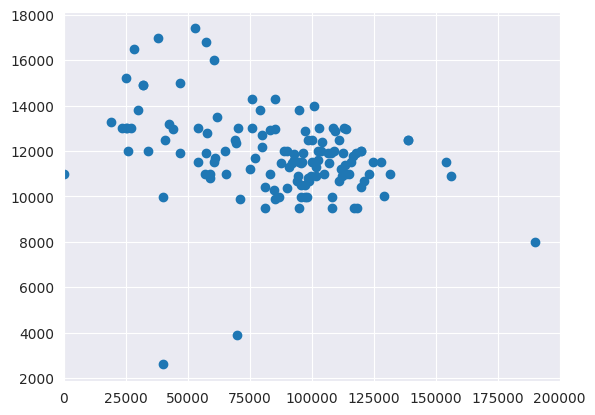

In [222]:
plt.scatter(scraped_ads_df.loc[(scraped_ads_df.brand=='suzuki')&(scraped_ads_df.model=='swift')&(scraped_ads_df.registration_year.between(2017,2019)),'mileage'], scraped_ads_df.loc[(scraped_ads_df.brand=='suzuki')&(scraped_ads_df.model=='swift')&(scraped_ads_df.registration_year.between(2017,2019)),'raw_price'])
plt.xlim([0,200000])

In [206]:
zoom.index

MultiIndex([(  'abarth', '124 spider', 16),
            (  'abarth', '124 spider', 17),
            (  'abarth',        '500',  8),
            (  'abarth',        '500',  9),
            (  'abarth',        '500', 10),
            (  'abarth',        '500', 11),
            (  'abarth',        '500', 12),
            (  'abarth',        '500', 13),
            (  'abarth',        '500', 14),
            (  'abarth',        '500', 15),
            ...
            (   'volvo',       'xc40', 24),
            (   'volvo',       'xc40', 25),
            ('wartburg',        '353', 77),
            ('wartburg',        '353', 83),
            ('wartburg',        '353', 84),
            ('wiesmann',       'mf 4',  1),
            (     'xev',       'yoyo', 24),
            (     'xev',       'yoyo', 25),
            (  'zhidou',         'd1',  7),
            (  'zhidou',         'd1', 16)],
           names=['brand', 'model', 'year'], length=11846)

In [182]:
zoom.loc[zoom.loc['raw_price']['mean'] < 12000 & zoom.loc['raw_price']['mean'] > 9000]

KeyError: 'raw_price'

In [143]:
scraped_ads_df.to_csv('../data/processed_ads_df.csv',index=False)

(0.0, 200000.0)

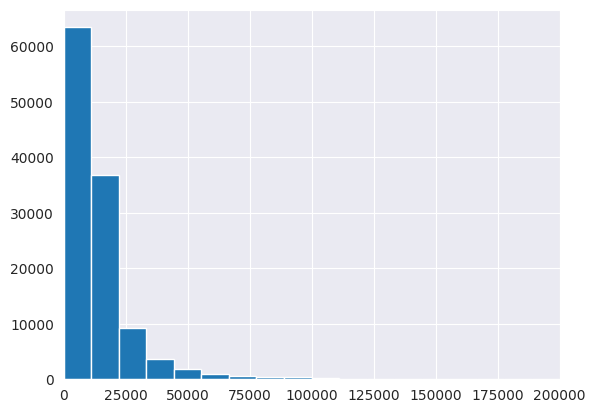

In [149]:
plt.hist(scraped_ads_df.raw_price,bins=100)
plt.xlim([0,200000])

(0.0, 300000.0)

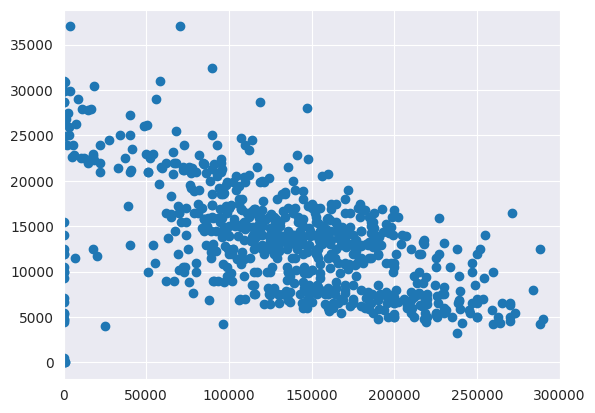

In [159]:
plt.scatter(scraped_ads_df[(scraped_ads_df.brand=='bmw') & (scraped_ads_df.model=='116')].mileage, scraped_ads_df[(scraped_ads_df.brand=='bmw') & (scraped_ads_df.model=='116')].raw_price)
plt.xlim([0,300000])

(1981.0, 2025.0)

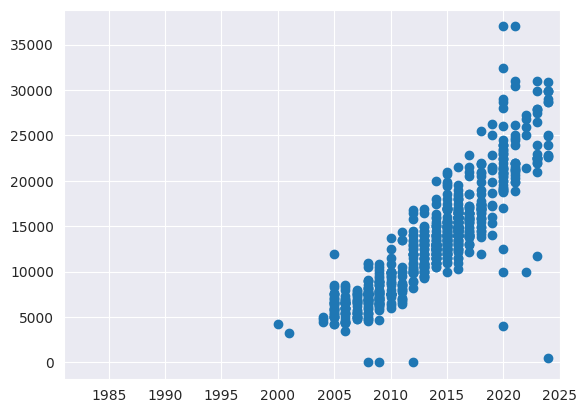

In [161]:
plt.scatter(scraped_ads_df[(scraped_ads_df.brand=='bmw') & (scraped_ads_df.model=='116')].registration_year, scraped_ads_df[(scraped_ads_df.brand=='bmw') & (scraped_ads_df.model=='116')].raw_price)
plt.xlim([1981,2025])

(1981.0, 2025.0)

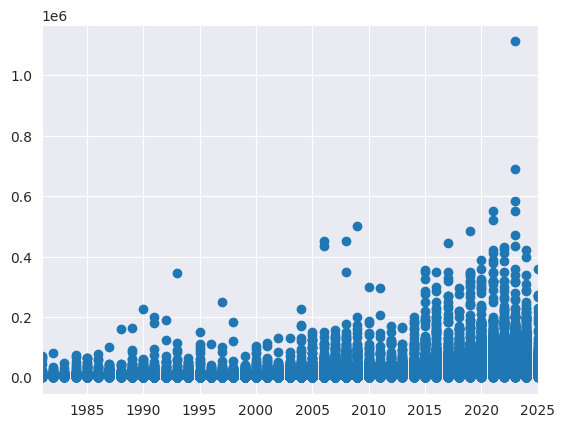

In [228]:
plt.scatter(scraped_ads_df.registration_year, scraped_ads_df.raw_price)
plt.xlim([1981,2025])

In [ ]:
plt.scatter(scraped_ads_df[(scraped_ads_df.brand=='bmw') & (scraped_ads_df.model=='116')].registration_year, scraped_ads_df[(scraped_ads_df.brand=='bmw') & (scraped_ads_df.model=='116')].raw_price)
plt.xlim([1981,2025])